In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Runs_ThreeYearAvgWickets.csv')

In [3]:
df.drop(columns = 'Unnamed: 0', inplace = True)

In [4]:
df.head()

,Date,Over,Over category,BattingOrder,WicketsInHand,Non Striker,Bowler,Bowler Type,3Yr_Econ_Avg,3Yr_Wickets_Total,Status,Opposition,Venue,Runs,CumulativeRunsForBowler
0,2011-04-09,5.4,Power Play,4,6,MA Agarwal,R Vinay Kumar,Right-arm fast-medium,8.287,30.0,Not Out,Kochi Tuskers Kerala,Kochi,0,4
1,2011-04-09,5.5,Power Play,4,6,MA Agarwal,R Vinay Kumar,Right-arm fast-medium,8.287,30.0,Not Out,Kochi Tuskers Kerala,Kochi,0,8
2,2011-04-09,5.6,Power Play,4,6,MA Agarwal,R Vinay Kumar,Right-arm fast-medium,8.287,30.0,Not Out,Kochi Tuskers Kerala,Kochi,0,12
3,2011-04-09,6.4,Middle Overs (6-10),4,6,MA Agarwal,M Muralitharan,Right-arm offbreak,6.343,40.0,Not Out,Kochi Tuskers Kerala,Kochi,2,4
4,2011-04-09,6.5,Middle Overs (6-10),4,6,MA Agarwal,M Muralitharan,Right-arm offbreak,6.343,40.0,Not Out,Kochi Tuskers Kerala,Kochi,0,8


## EDA

#### 1. BALLS FACED

C:\Users\Owner\Anaconda3\envs\NeuralNets\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


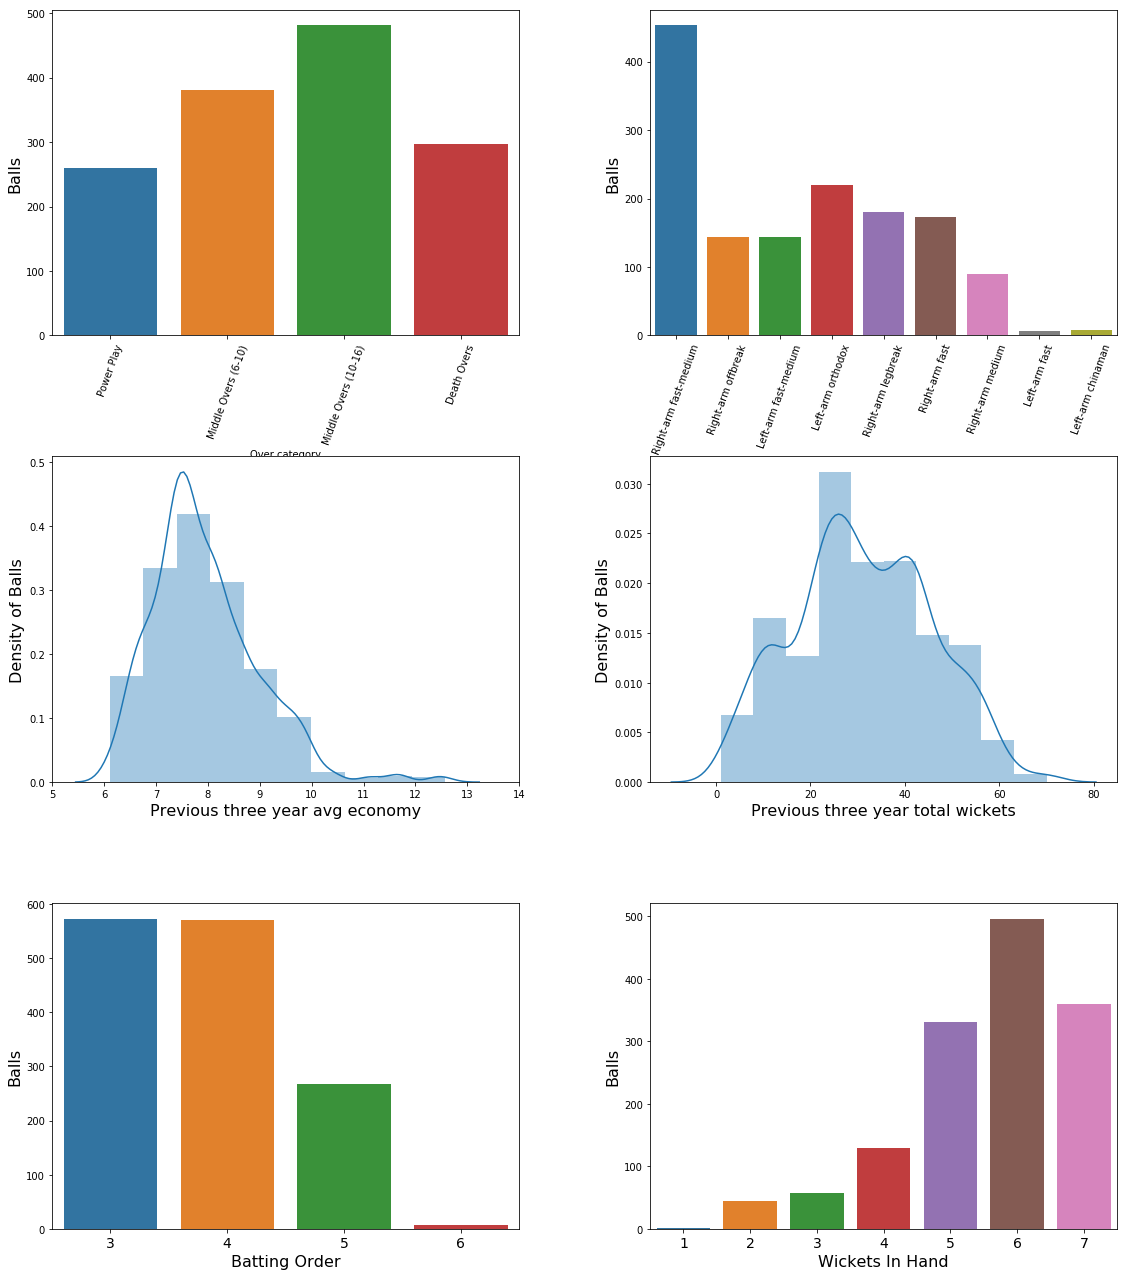

In [5]:
#Five parameter distribution
fig, ax = plt.subplots(figsize = (18, 20), nrows = 3, ncols = 2)
fig.tight_layout(pad = 10.0)

#Cat
sns.countplot(df['Over category'], ax = ax[0][0])
ax[0][0].tick_params(axis = 'x', labelrotation = 70)
ax[0][0].set_ylabel('Balls', fontsize = 16)
#Cat
sns.countplot(df['Bowler Type'], ax = ax[0][1])
ax[0][1].tick_params(axis = 'x', labelrotation = 70)
ax[0][1].set_ylabel('Balls', fontsize = 16)
#Num
sns.distplot(df['3Yr_Econ_Avg'], ax = ax[1][0], bins = 10)
ax[1][0].set_ylabel('Density of Balls', fontsize = 16)
ax[1][0].set_xlabel('Previous three year avg economy', fontsize = 16)
ax[1][0].set_xlim([5, 14])

sns.distplot(df['3Yr_Wickets_Total'], ax = ax[1][1], bins = 10)
ax[1][1].set_ylabel('Density of Balls', fontsize = 16)
ax[1][1].set_xlabel('Previous three year total wickets', fontsize = 16)

sns.countplot(df['BattingOrder'], ax = ax[2][0])
ax[2][0].set_xlabel('Batting Order', fontsize = 16)
ax[2][0].set_ylabel('Balls', fontsize = 16)
ax[2][0].tick_params(axis = 'x', labelsize = 14)

sns.countplot(df['WicketsInHand'], ax = ax[2][1])
ax[2][1].set_xlabel('Wickets In Hand', fontsize = 16)
ax[2][1].set_ylabel('Balls', fontsize = 16)
ax[2][1].tick_params(axis = 'x', labelsize = 14)

#### 2. TOTAL RUNS SCORED

Text(0.5, 1.0, 'Wickets In Hand')

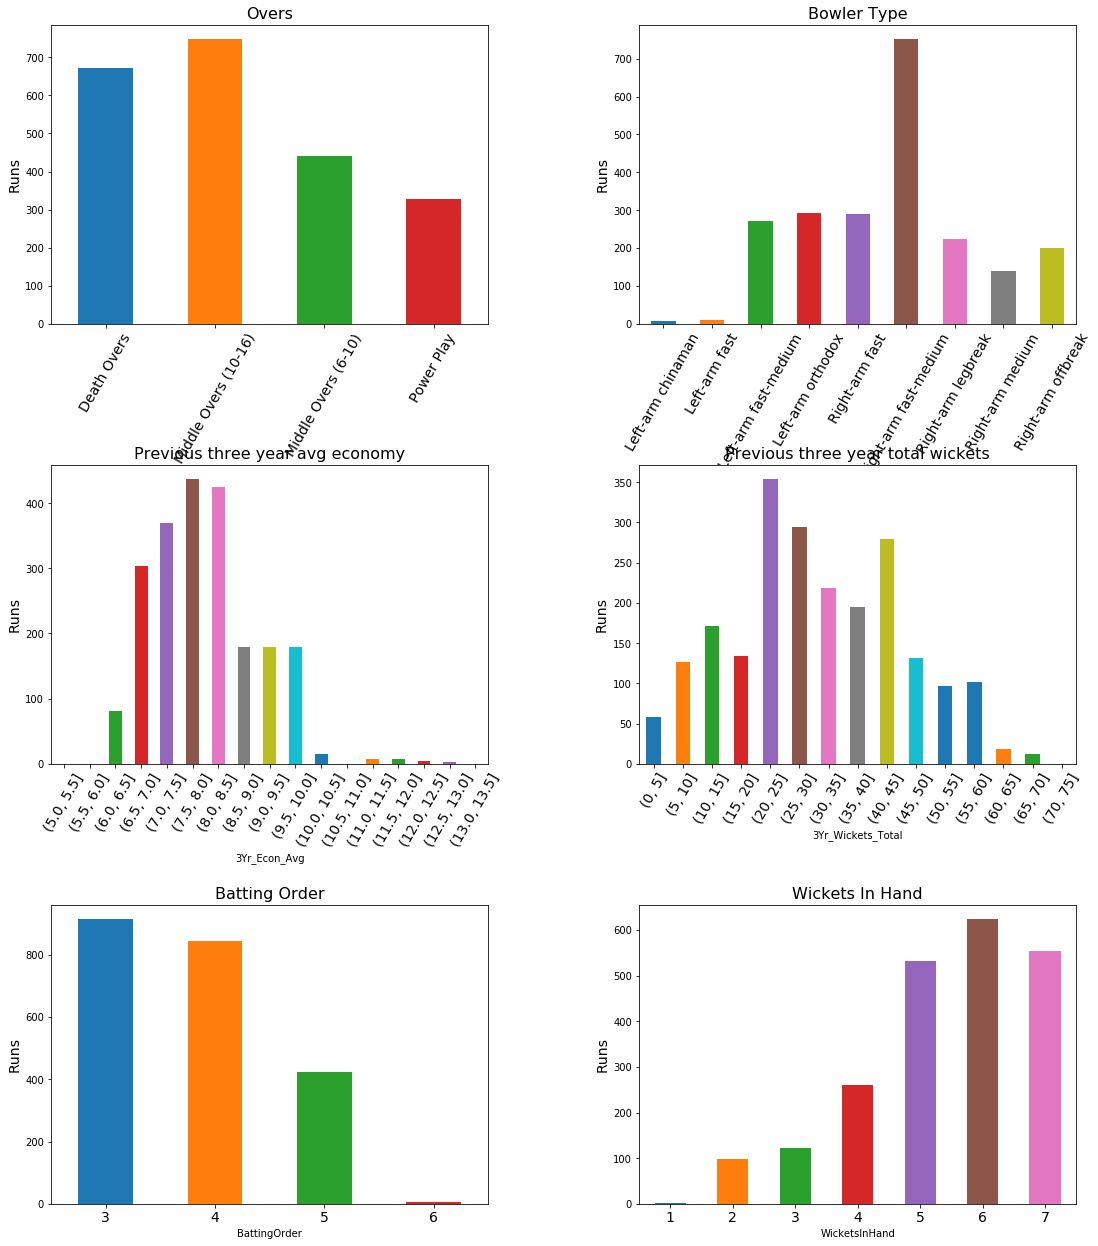

In [6]:
fig, ax = plt.subplots(figsize = (18, 20), nrows = 3, ncols = 2)
fig.tight_layout(pad = 12.0)

#
df.groupby(['Over category']).sum()['Runs'].plot(kind = 'bar', ax = ax[0][0])
ax[0][0].tick_params(axis = 'x', labelsize = 14, labelrotation = 60)
ax[0][0].set_ylabel('Runs', fontsize = 14)
ax[0][0].set_title('Overs', fontsize = 16)


#
df.groupby(['Bowler Type']).sum()['Runs'].plot(kind = 'bar', ax = ax[0][1])
ax[0][1].tick_params(axis = 'x', labelsize = 14, labelrotation = 60)
ax[0][1].set_ylabel('Runs', fontsize = 14)
ax[0][1].set_title('Bowler Type', fontsize = 16)


#
bins = pd.cut(df['3Yr_Econ_Avg'], np.arange(5,14,0.5))
df.groupby(bins).sum()['Runs'].plot(kind = 'bar', ax = ax[1][0])
ax[1][0].tick_params(axis = 'x', labelsize = 14, labelrotation = 60)
ax[1][0].set_ylabel('Runs', fontsize = 14)
ax[1][0].set_title('Previous three year avg economy', fontsize = 16);


#
bins = pd.cut(df['3Yr_Wickets_Total'], np.arange(0,80,5))
df.groupby(bins).sum()['Runs'].plot(kind = 'bar', ax = ax[1][1])
ax[1][1].tick_params(axis = 'x', labelsize = 14, labelrotation = 60)
ax[1][1].set_ylabel('Runs', fontsize = 14)
ax[1][1].set_title('Previous three year total wickets', fontsize = 16);


#
df.groupby(['BattingOrder']).sum()['Runs'].plot(kind = 'bar', ax = ax[2][0])
ax[2][0].tick_params(axis = 'x', labelsize = 14, labelrotation = 0)
ax[2][0].set_ylabel('Runs', fontsize = 14)
ax[2][0].set_title('Batting Order', fontsize = 16)

#
df.groupby(['WicketsInHand']).sum()['Runs'].plot(kind = 'bar', ax = ax[2][1])
ax[2][1].tick_params(axis = 'x', labelsize = 14, labelrotation = 0)
ax[2][1].set_ylabel('Runs', fontsize = 14)
ax[2][1].set_title('Wickets In Hand', fontsize = 16)



### 3. Dismissals

Text(0, 0.5, 'Dismissals')

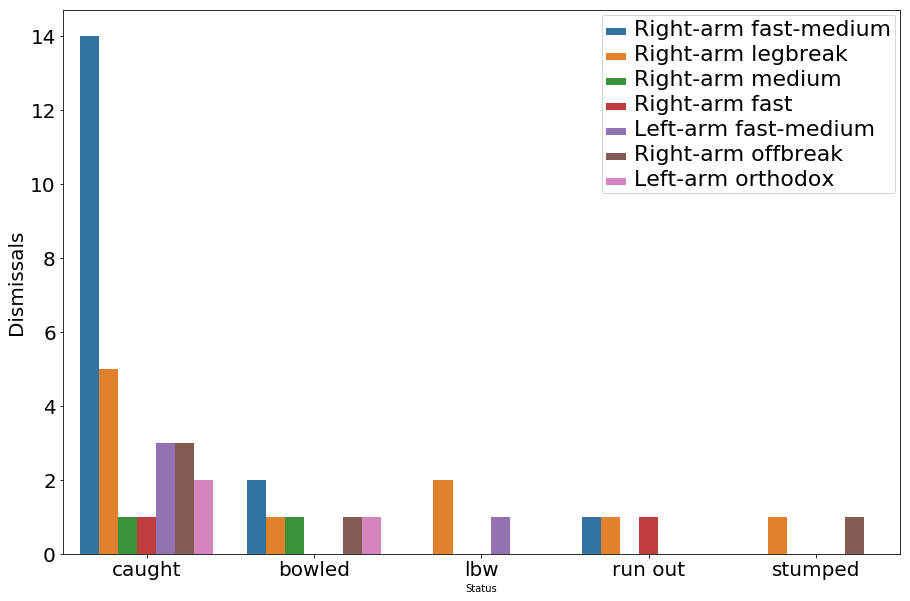

In [7]:
fig, ax = plt.subplots(figsize = (15,10))
test_df = df[df['Status'] != 'Not Out']
sns.countplot(x = test_df['Status'], hue = test_df['Bowler Type'] ,ax = ax)
plt.legend(loc = "upper right")
plt.setp(ax.get_legend().get_texts(), fontsize='22') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='22') # for legend title
ax.tick_params(axis = 'x', labelsize = 20)
ax.tick_params(axis = 'y', labelsize = 20)
ax.set_ylabel('Dismissals', fontsize = 20)

###  4.  Looking at dist between features and target variable  - runs scored 0,1,2,3,5,6

In [8]:
bins_econ = np.arange(5,14,0.5)
df['3Yr_econ_bin'] = pd.cut(df['3Yr_Econ_Avg'], bins_econ)

bins_wickets = np.arange(0,80,5)
df['3Yr_wicket_bin'] = pd.cut(df['3Yr_Wickets_Total'], bins_wickets)

df.drop(columns = ['3Yr_Econ_Avg', '3Yr_Wickets_Total'], inplace = True)

df[['3Yr_wicket_bin', '3Yr_econ_bin']] = df[['3Yr_wicket_bin', '3Yr_econ_bin']].astype(str)

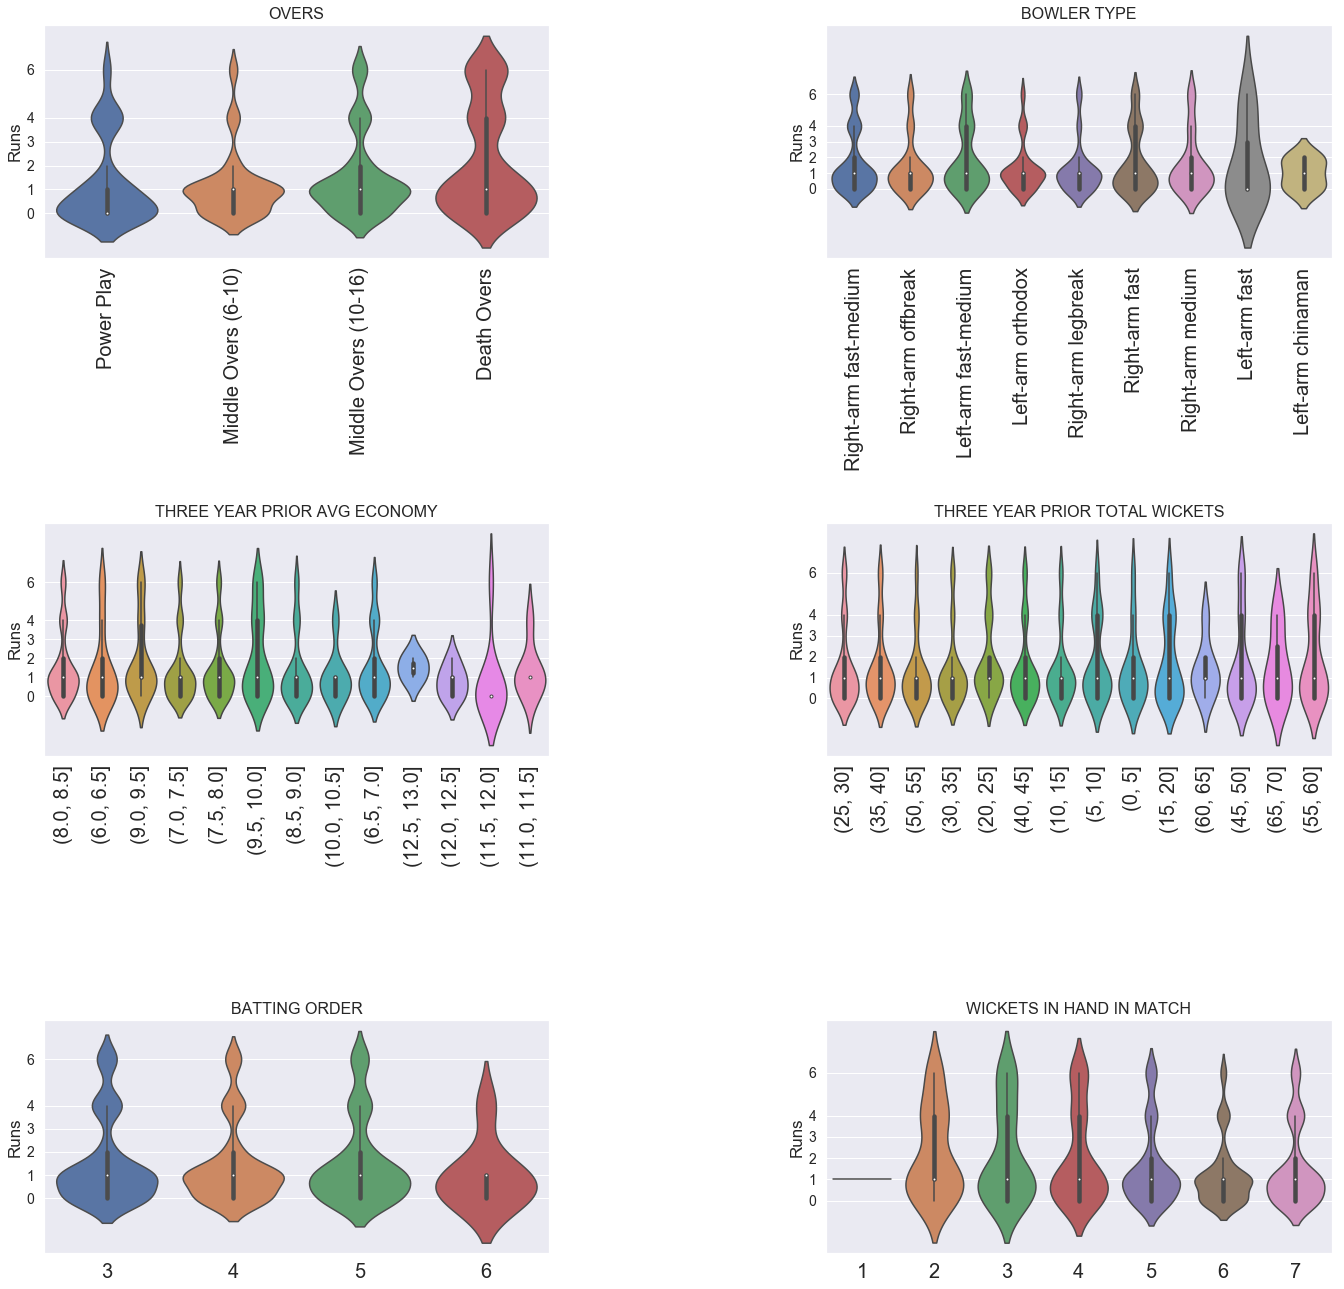

In [88]:
#Looking at correlation with each feature and Runs
fig, ax = plt.subplots(figsize = (25, 24), nrows = 3, ncols = 2)
fig.tight_layout(pad = 14.0)
sns.set(font_scale = 1.4)
sns.violinplot(x = 'Over category', y = 'Runs', \
            data = df[['Over category', 'Runs']], ax = ax[0][0], scale = "width")
ax[0][0].tick_params(axis = 'x', labelrotation = 90, labelsize = 20)
ax[0][0].tick_params(axis = 'y', labelsize = 14)
ax[0][0].set_yticks([0,1,2,3,4,6])
ax[0][0].set_xlabel(None)
ax[0][0].set_title('OVERS', fontsize = 16)

sns.violinplot(x = 'Bowler Type', y = 'Runs', \
            data = df[['Bowler Type', 'Runs']],ax = ax[0][1], scale = "width")
ax[0][1].tick_params(axis = 'x', labelrotation = 90, labelsize = 20)
ax[0][1].tick_params(axis = 'y', labelsize = 14)
ax[0][1].set_yticks([0,1,2,3,4,6])
ax[0][1].set_xlabel(None)
ax[0][1].set_title('BOWLER TYPE', fontsize = 16)

#3Yr_Econ_Avg
sns.violinplot(x = '3Yr_econ_bin', y = 'Runs',\
            data = df[['3Yr_econ_bin', 'Runs']], ax = ax[1][0], scale = "width")
ax[1][0].tick_params(axis = 'x', labelrotation = 90, labelsize = 20)
ax[1][0].tick_params(axis = 'y', labelsize = 14)
ax[1][0].set_yticks([0,1,2,3,4,6])
ax[1][0].set_xlabel(None)
ax[1][0].set_title('THREE YEAR PRIOR AVG ECONOMY', fontsize = 16)


#3Yr_Wickets_Total
sns.violinplot(x = '3Yr_wicket_bin', y = 'Runs',  \
            data = df[['3Yr_wicket_bin', 'Runs']], ax = ax[1][1], scale = "width")
ax[1][1].tick_params(axis = 'x', labelrotation = 90, labelsize = 20)
ax[1][1].tick_params(axis = 'y', labelsize = 14)
ax[1][1].set_yticks([0,1,2,3,4,6])
ax[1][1].set_xlabel(None)
ax[1][1].set_title('THREE YEAR PRIOR TOTAL WICKETS', fontsize = 16)

#Batting order
sns.violinplot(x = 'BattingOrder', y = 'Runs', \
            data = df[['BattingOrder', 'Runs']], ax = ax[2][0], scale = "width")
ax[2][0].tick_params(axis = 'x', labelsize = 20)
ax[2][0].tick_params(axis = 'y', labelsize = 14)
ax[2][0].set_yticks([0,1,2,3,4,6])
ax[2][0].set_xlabel(None)
ax[2][0].set_title('BATTING ORDER', fontsize = 16)

#Batting order
sns.violinplot(x = 'WicketsInHand', y = 'Runs', \
            data = df[['WicketsInHand', 'Runs']], ax = ax[2][1], scale = "width")
ax[2][1].tick_params(axis = 'x', labelsize = 20)
ax[2][1].tick_params(axis = 'y', labelsize = 14)
ax[2][1].set_yticks([0,1,2,3,4,6])
ax[2][1].set_xlabel(None)
ax[2][1].set_title('WICKETS IN HAND IN MATCH', fontsize = 16)

plt.savefig('VariableDistribution.pdf')

### 5. Feature Selection with chi squared and mutual information statstic

In [92]:
df[['Over category', 'Bowler Type', '3Yr_econ_bin', '3Yr_wicket_bin', \
    'BattingOrder', 'WicketsInHand', 'Runs']].groupby('Runs').count()

,Over category,Bowler Type,3Yr_econ_bin,3Yr_wicket_bin,BattingOrder,WicketsInHand
Runs,,,,,,
0,459,459,459,459,459,459
1,560,560,560,560,560,560
2,100,100,100,100,100,100
3,4,4,4,4,4,4
4,176,176,176,176,176,176
6,119,119,119,119,119,119


In [96]:
#Performing a chi squared test
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

In [99]:
def prepare_inputs(X):
    oe = OrdinalEncoder()
    oe.fit(X)
    X_enc = oe.transform(X)
    return X_enc
 
# prepare target
def prepare_targets(y):
    le = LabelEncoder()
    le.fit(y)
    y_enc = le.transform(y)
    return y_enc

X = prepare_inputs(df[['Over category', 'Bowler Type', '3Yr_econ_bin', '3Yr_wicket_bin', \
    'BattingOrder', 'WicketsInHand']])
Y = prepare_targets(df['Runs'])

In [101]:
chi2, pval = chi2(X,Y)

<BarContainer object of 6 artists>

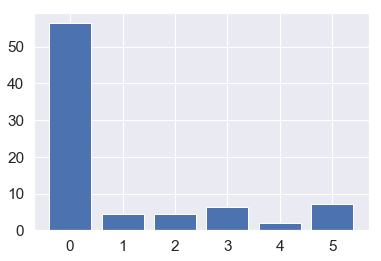

In [107]:
plt.bar(x = np.arange(6), height = chi2)

In [103]:
pval

array([6.83571916e-11, 4.98118839e-01, 4.74000137e-01, 2.83323921e-01,
       8.52751691e-01, 2.10489947e-01])